In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn import metrics
import seaborn as sns
%matplotlib inline

## Pre-Task: Describe the goals of your study

## Part 1: Aquire the Data

#### 1. Connect to the remote database

In [5]:
import connection

from sqlalchemy import create_engine
import pandas as pd
engine = create_engine(connection.params)

pd.read_sql("SELECT * FROM train LIMIT 5", con=engine).head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S


#### 2. Query the database and aggregate the data

#### 5. What are the risks and assumptions of our data? 

## Part 2: Exploratory Data Analysis

#### 1. Describe the Data

In [6]:
titanic = pd.read_csv('../../assets/data/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 2. Visualize the Data

In [7]:
print np.mean(titanic.Age)
titanic.describe()

29.6991176471


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


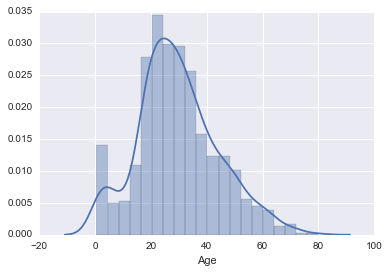

In [8]:
sns.distplot(titanic.Age[titanic.Age.isnull() == False])

In [9]:
titanic.Age.isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [10]:
mu = 29.6991176471
s = 14.526497
size = 177
#np.random.seed(5)

norm_age = np.random.normal(mu,s,size)
titanic.ix[titanic.Age.isnull(), 'Age'] = norm_age


29.3735502909


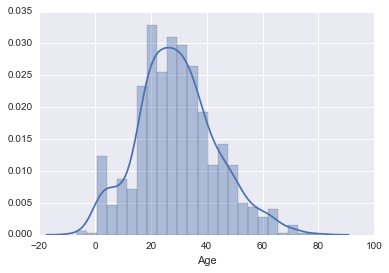

In [11]:
print np.mean(titanic.Age)
sns.distplot(titanic.Age)

In [12]:
titanic.Embarked.value_counts()
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

## Part 3: Data Wrangling

#### 1. Create Dummy Variables for *Sex* 

In [13]:
titanic.Sex = titanic.Sex.apply(lambda x: 0 if x == 'female' else 1)
titanic.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

## Part 4: Logistic Regression and Model Validation

In [14]:
titanic_set = titanic[['Age','Fare','Sex','Embarked','SibSp','Parch','Pclass','Fare','Survived']]

preds = titanic_set[['Age','Fare']].columns
titanic_set[preds] = (titanic[preds] - titanic[preds].mean()) / titanic[preds].std()
titanic_set.head()

/Users/Stav/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2369: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,Age,Fare,Sex,Embarked,SibSp,Parch,Pclass,Fare,Survived
0,-0.520995,-0.502163,1,S,1,0,3,-0.502163,0
1,0.609521,0.786404,0,C,1,0,1,0.786404,1
2,-0.238366,-0.488580,0,S,0,0,3,-0.488580,1
3,0.397550,0.420494,0,S,1,0,1,0.420494,1
4,0.397550,-0.486064,1,S,0,0,3,-0.486064,0


#### 1. Define the variables that we will use in our classification analysis

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
import patsy

formula = 'Survived ~ Age + C(Sex) + C(Embarked) + C(SibSp) + C(Parch) + C(Pclass) + Fare - 1'

#### 2. Transform "Y" into a 1-Dimensional Array for SciKit-Learn

In [16]:
y_mat, x_mat = patsy.dmatrices(formula, data = titanic_set)
y_mat = np.ravel(y_mat)

#### 3. Conduct the logistic regression

In [17]:
logreg = LogisticRegression()    # Create logistic Regression object
logreg.fit(x_mat,y_mat)   # fit on our data

print logreg.score(x_mat,y_mat)   # score our data

0.820022497188


In [18]:
print titanic_set.shape
x_mat

(891, 9)


DesignMatrix with shape (889, 21)
  Columns:
    ['C(Sex)[0]',
     'C(Sex)[1]',
     'C(Embarked)[T.Q]',
     'C(Embarked)[T.S]',
     'C(SibSp)[T.1]',
     'C(SibSp)[T.2]',
     'C(SibSp)[T.3]',
     'C(SibSp)[T.4]',
     'C(SibSp)[T.5]',
     'C(SibSp)[T.8]',
     'C(Parch)[T.1]',
     'C(Parch)[T.2]',
     'C(Parch)[T.3]',
     'C(Parch)[T.4]',
     'C(Parch)[T.5]',
     'C(Parch)[T.6]',
     'C(Pclass)[T.2]',
     'C(Pclass)[T.3]',
     'Age',
     'Fare[0]',
     'Fare[1]']
  Terms:
    'C(Sex)' (columns 0:2)
    'C(Embarked)' (columns 2:4)
    'C(SibSp)' (columns 4:10)
    'C(Parch)' (columns 10:16)
    'C(Pclass)' (columns 16:18)
    'Age' (column 18)
    'Fare' (columns 19:21)
  (to view full data, use np.asarray(this_obj))

In [19]:
x_mat.design_info.column_names

['C(Sex)[0]',
 'C(Sex)[1]',
 'C(Embarked)[T.Q]',
 'C(Embarked)[T.S]',
 'C(SibSp)[T.1]',
 'C(SibSp)[T.2]',
 'C(SibSp)[T.3]',
 'C(SibSp)[T.4]',
 'C(SibSp)[T.5]',
 'C(SibSp)[T.8]',
 'C(Parch)[T.1]',
 'C(Parch)[T.2]',
 'C(Parch)[T.3]',
 'C(Parch)[T.4]',
 'C(Parch)[T.5]',
 'C(Parch)[T.6]',
 'C(Pclass)[T.2]',
 'C(Pclass)[T.3]',
 'Age',
 'Fare[0]',
 'Fare[1]']

#### 4. Examine the coefficients to see our correlations

In [20]:
df = pd.DataFrame({'features':x_mat.design_info.column_names, 'coefs':logreg.coef_[0]})   # make data frame of coefficients
df


,coefs,features
0,1.655120,C(Sex)[0]
1,-0.852748,C(Sex)[1]
2,0.090061,C(Embarked)[T.Q]
3,-0.372156,C(Embarked)[T.S]
4,0.172597,C(SibSp)[T.1]
5,-0.062414,C(SibSp)[T.2]
6,-1.328390,C(SibSp)[T.3]
7,-0.951330,C(SibSp)[T.4]
8,-0.745849,C(SibSp)[T.5]
9,-1.005779,C(SibSp)[T.8]


#### 6. Test the Model by introducing a *Test* or *Validaton* set 

In [21]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_mat,y_mat, test_size = .33,)
logreg.fit(X_train,Y_train)

print logreg.score(X_train, Y_train)
print logreg.score(X_test, Y_test)

0.823529411765
0.775510204082


#### 7. Predict the class labels for the *Test* set

In [22]:
y_pred = logreg.predict(X_test)
y_pred

array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,
        0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,
        0.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
        1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,
        1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,
        0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,
        1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,
        1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,
        1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0

#### 8. Predict the class probabilities for the *Test* set

In [23]:
y_proba = logreg.predict_proba(X_test)
y_proba[0:5]

array([[ 0.17971889,  0.82028111],
       [ 0.61963798,  0.38036202],
       [ 0.92629496,  0.07370504],
       [ 0.83274369,  0.16725631],
       [ 0.60804469,  0.39195531]])

#### 9. Evaluate the *Test* set

In [24]:
print logreg.score(X_test, Y_test)

0.775510204082


#### 10. Cross validate the test set

In [25]:
scores = cross_val_score(logreg, X_test, Y_test, cv = 5)
print scores
print np.mean(scores)


[ 0.86666667  0.71666667  0.82758621  0.74137931  0.79310345]
0.78908045977


#### 11. Check the Classification Report

In [28]:
#cross_val_score?

#### 12. What do the classification metrics tell us?

In [29]:
# classification metrics tell us how the model scored through different validation splits

#### 13. Check the Confusion Matrix

In [40]:
# Print the confusion matrix, TP, TN, FP, FN
y_pred = logreg.predict(X_test)
print y_pred.shape, Y_test.shape

lr_conf = pd.crosstab(Y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
lr_conf

(294,) (294,)


Predicted,0.0,1.0,All
True,,,
0.0,140,27,167
1.0,39,88,127
All,179,115,294


In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[140,  27],
       [ 39,  88]])

#### 14. What does the Confusion Matrix tell us? 

Number of False Positives, False Negatives, True Positives, True negatives

#### 15. Plot the ROC curve

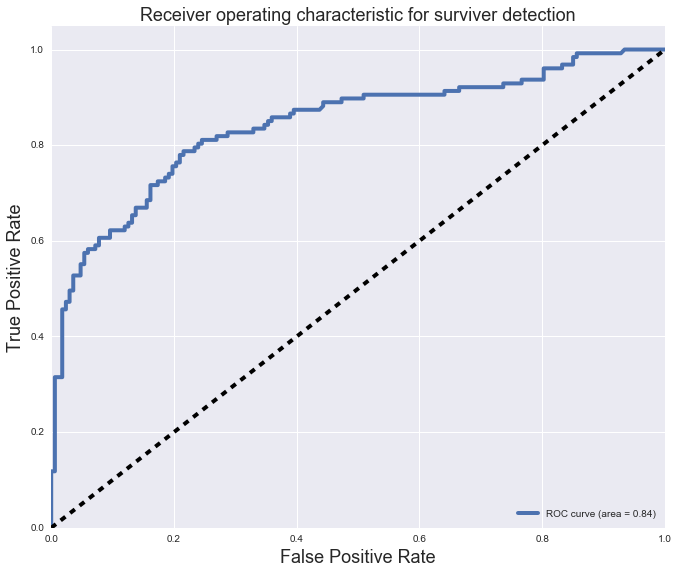

In [45]:
from sklearn.metrics import roc_curve, auc
Y_score = logreg.decision_function(X_test)

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(Y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for surviver detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [53]:
Y_score[0:10]

array([ 1.5182532 , -0.48801194, -2.5311216 , -1.60519849, -0.43910053,
        1.33504281, -2.336114  ,  0.5752194 ,  0.34733348, -1.01557763])

#### 16. What does the ROC curve tell us?

Ratio of false positives + false negatives to true positives and true negatives

## Part 5: Gridsearch

#### 1. Use GridSearchCV with logistic regression to search for optimal parameters 

- Use the provided parameter grid. Feel free to add if you like (such as n_jobs).
- Use 5-fold cross-validation.

In [33]:
logreg_parameters = {
    'penalty':['l1','l2'],
    'C':np.logspace(-5,1,50),
    'solver':['liblinear'],
    'n_jobs':[-1]
}

from sklearn.grid_search import GridSearchCV

estimator = GridSearchCV(logreg, logreg_parameters, cv = 5)
estimator.fit(X_test, Y_test)



GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-05,   1.32571e-05,   1.75751e-05,   2.32995e-05,
         3.08884e-05,   4.09492e-05,   5.42868e-05,   7.19686e-05,
         9.54095e-05,   1.26486e-04,   1.67683e-04,   2.22300e-04,
         2.94705e-04,   3.90694e-04,   5.17947e-04,   6.8...e+00,   5.68987e+00,
         7.54312e+00,   1.00000e+01]), 'n_jobs': [-1], 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

#### 2. Print out the best parameters and best score. Are they better than the vanilla logistic regression?

In [34]:

print "Best Estimator:",estimator
print "Best Params:", estimator.best_params_
print "Best Score:", estimator.best_score_
# best parameters is l2 or ridge, the logistic regression is about the same when using the test data

Best Estimator: GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-05,   1.32571e-05,   1.75751e-05,   2.32995e-05,
         3.08884e-05,   4.09492e-05,   5.42868e-05,   7.19686e-05,
         9.54095e-05,   1.26486e-04,   1.67683e-04,   2.22300e-04,
         2.94705e-04,   3.90694e-04,   5.17947e-04,   6.8...e+00,   5.68987e+00,
         7.54312e+00,   1.00000e+01]), 'n_jobs': [-1], 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)
Best Params: {'penalty': 'l1', 'C': 5.689866029018293, 'n_jobs': -1, 'solver': 'liblinear'}
Best Score: 0.802721088435


#### 3. Explain the difference between the difference between the L1 (Lasso) and L2 (Ridge) penalties on the model coefficients.

L1 otherwise known as Lasso, uses 

#### 4. What hypothetical situations are the Ridge and Lasso penalties useful?

Get rid of variables

#### 5. [BONUS] Explain how the regularization strength (C) modifies the regression loss function. Why do the Ridge and Lasso penalties have their respective effects on the coefficients?

#### 6.a. [BONUS] You decide that you want to minimize false positives. Use the predicted probabilities from the model to set your threshold for labeling the positive class to need at least 90% confidence. How and why does this affect your confusion matrix?

## Part 6: Gridsearch and kNN

#### 1. Perform Gridsearch for the same classification problem as above, but use KNeighborsClassifier as your estimator

At least have number of neighbors and weights in your parameters dictionary.

In [46]:
from sklearn.neighbors import KNeighborsClassifier


formula = 'Survived ~ Age + C(Sex) + C(Embarked) + C(SibSp) + C(Parch) + C(Pclass) + Fare - 1'
y_mat, x_mat = patsy.dmatrices(formula, data = titanic_set)
y_mat = np.ravel(y_mat)

search_parameters = {
    'n_neighbors':  [3,50], 
    'weights':      ("uniform", "distance"),
    'algorithm':    ("ball_tree", "kd_tree", "brute", "auto"),
    'p':            [1,2],
    'n_jobs':[-1]
}
from sklearn import svm, grid_search, datasets
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
clf = grid_search.GridSearchCV(knn, search_parameters)


clf.fit(x_mat, y_mat)


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 50], 'n_jobs': [-1], 'weights': ('uniform', 'distance'), 'algorithm': ('ball_tree', 'kd_tree', 'brute', 'auto'), 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

#### 2. Print the best parameters and score for the gridsearched kNN model. How does it compare to the logistic regression model?

In [47]:

print "Best Estimator:", clf.best_estimator_.n_neighbors
print "Best Params:", clf.best_params_
print "Best Score:", clf.best_score_


Best Estimator: 3
Best Params: {'n_neighbors': 3, 'n_jobs': -1, 'weights': 'uniform', 'algorithm': 'ball_tree', 'p': 2}
Best Score: 0.788526434196


#### 3. How does the number of neighbors affect the bias-variance tradeoff of your model?

#### [BONUS] Why?

#### bias variance.
bias:a model is biased if it makes assumptions about what the data should look like and misses the mark.our model has an opinion about the shape of the data that's not quite right, so we say it is biased. More data isn't going to help, and a different sampling of data won't either

High neighbors translates to more complexity and eventually overfitting. In the most complex case you use the max number of neighbors and your model only fits well to the current data, you have high bias and high variance every time you predict new data. 
large k's there isn't much variance but there is high bias since it doesn't work well iwth new data. 

On the other hand, if you have a very low number of neighbors, you have a very low bias because it fits to multiple sets  but high variance of predictions.


increasing k will decrease variance and increase bias. While decreasing k will increase variance and decrease bias.

#### 4. In what hypothetical scenario(s) might you prefer logistic regression over kNN, aside from model performance metrics?

In [ ]:
# You would prefer logistical regression in cases where there is a binary category

#### 5. Fit a new kNN model with the optimal parameters found in gridsearch. 

In [82]:
knn = KNeighborsClassifier(n_neighbors = 50, weights = 'uniform', algorithm = 'ball_tree')
clf_op = knn.fit(X_train, Y_train)
print clf_op.score(X_train,Y_train)
print clf_op.score(X_test,Y_test)

0.8
0.755102040816


#### 6. Construct the confusion matrix for the optimal kNN model. Is it different from the logistic regression model? If so, how?

In [49]:
y_pred = clf_op.predict(X_test)
print y_pred.shape, Y_test.shape

knn_conf = pd.crosstab(Y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
knn_conf

(294,) (294,)


Predicted,0.0,1.0,All
True,,,
0.0,147,20,167
1.0,52,75,127
All,199,95,294


#### 7. [BONUS] Plot the ROC curves for the optimized logistic regression model and the optimized kNN model on the same plot.

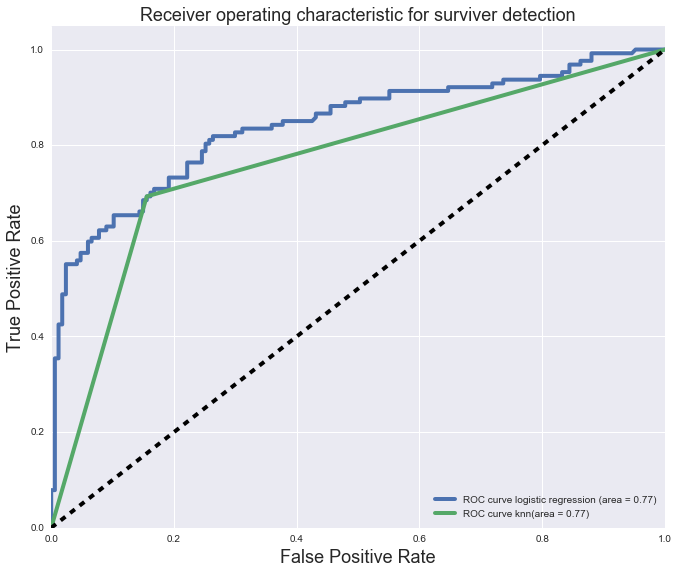

In [121]:
from sklearn.metrics import roc_curve, auc
#Y_score = knn.decision_function(X_test)

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(Y_test, y_pred)
ROC_AUC[1] = auc(FPR[1], TPR[1])
Y_score = logreg.decision_function(X_test)

FPR_l = dict()
TPR_l = dict()
ROC_AUC_l = dict()

# For class 1, find the area under the curve
FPR_l[1], TPR_l[1], _ = roc_curve(Y_test, Y_score)
ROC_AUC_l[1] = auc(FPR[1], TPR[1])
# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR_l[1], TPR_l[1], label='ROC curve logistic regression (area = %0.2f)' % ROC_AUC_l[1], linewidth=4)

plt.plot(FPR[1], TPR[1], label='ROC curve knn(area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for surviver detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()


# Y_score = logreg.decision_function(X_test)

# FPR_l = dict()
# TPR_l = dict()
# ROC_AUC_l = dict()

# # For class 1, find the area under the curve
# FPR_l[1], TPR_l[1], _ = roc_curve(Y_test, Y_score)
# ROC_AUC_l[1] = auc(FPR[1], TPR[1])

# # Plot of a ROC curve for class 1 (has_cancer)
# plt.figure(figsize=[11,9])
# plt.plot(FPR_l[1], TPR_l[1], label='ROC curve (area = %0.2f)' % ROC_AUC_l[1], linewidth=4)
# plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate', fontsize=18)
# plt.ylabel('True Positive Rate', fontsize=18)
# plt.title('Receiver operating characteristic for surviver detection', fontsize=18)
# plt.legend(loc="lower right")
# plt.show()

## Part 7: [BONUS] Precision-recall

#### 1. Gridsearch the same parameters for logistic regression but change the scoring function to 'average_precision'

`'average_precision'` will optimize parameters for area under the precision-recall curve instead of for accuracy.

In [79]:
logreg_parameters = {
    'penalty':['l1','l2'],
    'C':np.logspace(-5,1,50),
    'solver':['liblinear'],
    'n_jobs':[-1],
}

from sklearn.grid_search import GridSearchCV
#
estimator_pre = GridSearchCV(logreg, logreg_parameters,scoring = 'average_precision', cv = 5)
estimator_pre.fit(X_train, Y_train)
estimator_pre.score(X_test,Y_test)




/Users/Stav/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:418: ChangedBehaviorWarning: The long-standing behavior to use the estimator's score function in GridSearchCV.score has changed. The scoring parameter is now used.
  ChangedBehaviorWarning)


0.83883461017057903

In [71]:
estimator.get_params().keys()

['n_jobs',
 'verbose',
 'estimator__penalty',
 'param_grid',
 'cv',
 'scoring',
 'estimator__verbose',
 'pre_dispatch',
 'estimator__intercept_scaling',
 'fit_params',
 'estimator__max_iter',
 'estimator__warm_start',
 'estimator__solver',
 'refit',
 'iid',
 'estimator__dual',
 'estimator__fit_intercept',
 'estimator__n_jobs',
 'estimator__class_weight',
 'estimator__C',
 'estimator__random_state',
 'estimator',
 'error_score',
 'estimator__multi_class',
 'estimator__tol']

#### 2. Examine the best parameters and score. Are they different than the logistic regression gridsearch in part 5?

In [72]:
#print "Best Estimator:",estimator
print "Best Params:", estimator_pre.best_params_
print "Best Score:", estimator_pre.best_score_
# best parameters is l2 or ridge, the logistic regression is about the same when using the test data

Best Params: {'penalty': 'l1', 'C': 0.33932217718953295, 'n_jobs': -1, 'solver': 'liblinear'}
Best Score: 0.829087637387


#### 3. Create the confusion matrix. Is it different than when you optimized for the accuracy? If so, why would this be?

In [113]:
logreg_precision = LogisticRegression(penalty = 'l1', C = 0.33932217718953295, solver = 'liblinear' )    # Create logistic Regression object
logreg_precision.fit(X_train,Y_train)   # fit on our data

print logreg_precision.score(X_train,Y_train)   # score our data

0.820168067227


In [114]:
y_pred = logreg.predict(X_test)
print y_pred.shape, Y_test.shape

logreg_pre = pd.crosstab(Y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
logreg_pre

(294,) (294,)


Predicted,0.0,1.0,All
True,,,
0.0,141,26,167
1.0,39,88,127
All,180,114,294


#### 4. Plot the precision-recall curve. What does this tell us as opposed to the ROC curve?

[See the sklearn plotting example here.](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

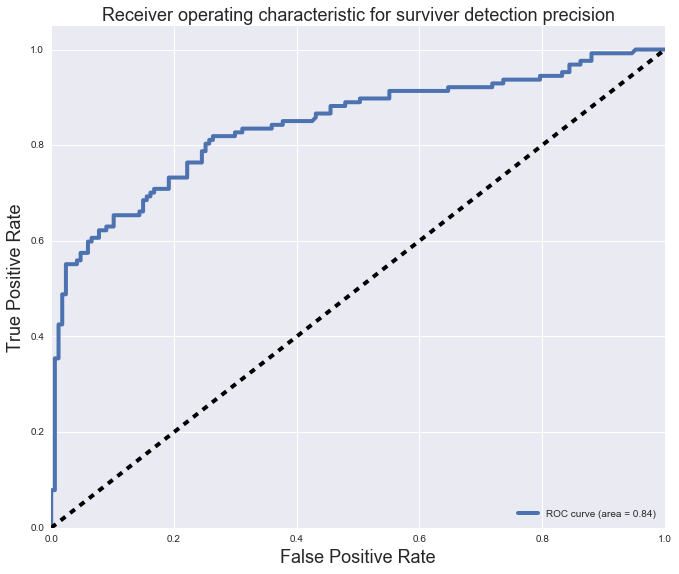

In [115]:
from sklearn.metrics import average_precision_score
Y_score = logreg_precision.decision_function(X_test)

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(Y_test, Y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for surviver detection precision', fontsize=18)
plt.legend(loc="lower right")
plt.show()


## Part 8: [VERY BONUS] Decision trees, ensembles, bagging

#### 1. Gridsearch a decision tree classifier model on the data, searching for optimal depth. Create a new decision tree model with the optimal parameters.

In [116]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = None) # initialize decision tree
dtc_scores = cross_val_score(dtc,x_mat, y_mat, cv = 5)   #pass cross_val_score the decision tree object, data, and the crossfolds
print dtc_scores
print np.mean(dtc_scores)


[ 0.70786517  0.78089888  0.81460674  0.74157303  0.77966102]
0.764920967435


In [117]:
dtc = DecisionTreeClassifier(max_depth = None)
dtc = dtc.fit(X_train,Y_train)
dtc.score(X_test,Y_test)

0.75170068027210879

#### 2. Compare the performace of the decision tree model to the logistic regression and kNN models.

In [ ]:
# decision tree performed poorer than KNN models

#### 3. Plot all three optimized models' ROC curves on the same plot. 

#### 4. Use sklearn's BaggingClassifier with the base estimator your optimized decision tree model. How does the performance compare to the single decision tree classifier?

#### 5. Gridsearch the optimal n_estimators, max_samples, and max_features for the bagging classifier.

#### 6. Create a bagging classifier model with the optimal parameters and compare it's performance to the other two models.

In [109]:
logreg.decision_function?